# Problem: Random Chords on a Square

Consider a square with side length $L$. Two points are chosen uniformly at random **on the boundary** of the square. A line segment is drawn connecting these two points.

**What is the probability that the length of this line segment exceeds $L$?**

![Random Points on Square Boundary](Images/Random%20Points%20on%20Square%20Boundary.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def initiatialize_square(L = 1, n_points = 11):
    x = np.linspace(0, L, n_points)
    y = np.linspace(0, L, n_points)
    return L, x, y

In [2]:
def probability_same_side(L, y):
    """Compute the probability that two points on the same side are more than L apart."""
    Y1, Y2 = np.meshgrid(y, y)
    successes = np.sum(np.abs(Y1 - Y2) > L)
    total = Y1.size
    return successes / total

In [3]:
def probability_adjacent_sides(L, x, y):
    """Compute the probability that two points on adjacent sides are more than L apart."""
    Y1, X2 = np.meshgrid(y, x)
    successes = np.sum(Y1**2 + X2**2 > L)
    total = Y1.size
    return successes / total

In [4]:
def probability_opposite_sides(L, y):
    """Compute the probability that two points on opposite sides are more than L apart."""
    Y1, Y2 = np.meshgrid(y, y)
    successes = np.sum(L**2 + (np.abs(Y1 - Y2))**2 > L)
    total = Y1.size
    return successes / total

In [ ]:
def compute_total_probability(L=1, n_points=1001):
    """Compute the total probability for a square with side length L."""
    _, x, y = initiatialize_square(L, n_points)
    
    p_same = probability_same_side(L, y)
    p_adjacent = probability_adjacent_sides(L, x, y)    
    p_opposite = probability_opposite_sides(L, y)    
    
    p_total = (p_same + 2*p_adjacent + p_opposite) / 4 # Average over all configurations: 4 same-side cases, 4 adjacent pairs, 1 opposite pair per axis

    return p_total

In [6]:
# Test with a specific configuration
L = 1
n_points = 1001
p_total = compute_total_probability(L, n_points)
print(f"Probability (L={L}, n_points={n_points}): {p_total:.6f}")
print(f"Analytical result: {(3 - np.pi/2)/4:.6f}")

Probability (L=1, n_points=1001): 0.357341
Analytical result: 0.357301


## Convergence Analysis

Let's examine how the numerical approximation converges to the true probability as we increase the number of discretization points.

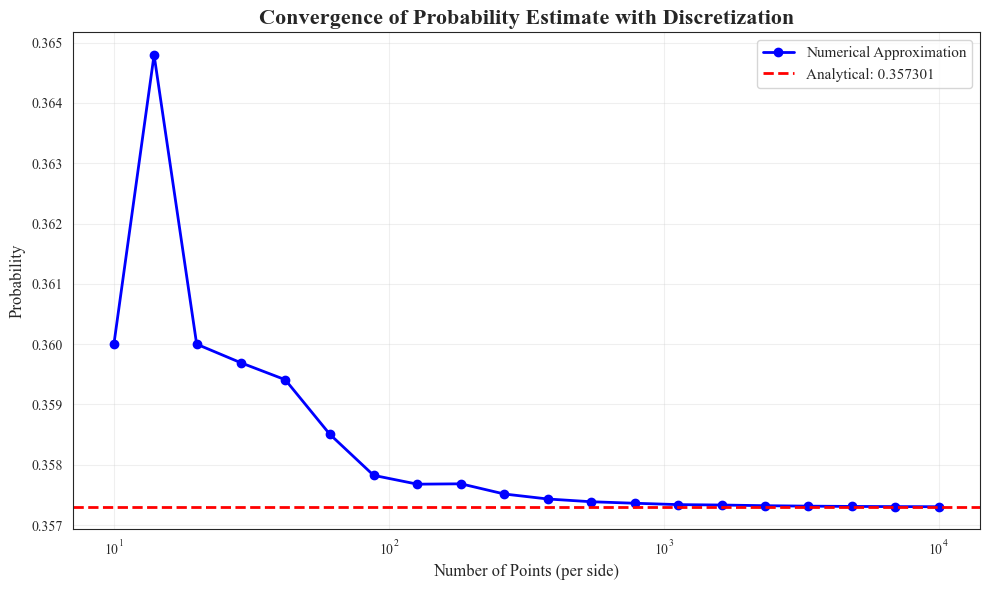

In [7]:
# Set style
sns.set_style("white")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Convergence curve: vary number of points
n_points_list = np.logspace(1, 4, 20, dtype=int)  # From 10 to 10,000 points
probabilities = []

for n in n_points_list:
    p = compute_total_probability(L=1, n_points=n)
    probabilities.append(p)

# Analytical result
analytical = (3 - np.pi/2)/4

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(n_points_list, probabilities, 'b-o', linewidth=2, markersize=6, label='Numerical Approximation')
ax.axhline(y=analytical, color='r', linestyle='--', linewidth=2, label=f'Analytical: {analytical:.6f}')
ax.set_xlabel('Number of Points (per side)', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_title('Convergence of Probability Estimate with Discretization', fontsize=16, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
plt.tight_layout()
plt.show()